In [1]:
#importing required libraries
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

In [139]:
df = pd.read_csv('messages.csv')

In [140]:
df.tail(50)

,subject,message,label
2843,"re : 8 . 1098 , qs : french , chinese poetry ,...",> > - - - - - - - - - - - - - - - - - - - - - ...,0
2844,ernest scatton,hi . does anybody have an internet address of ...,0
2845,ipa fonts for unix ( tex ),"in linguist 6 . 810 , steve anderson requested...",0
2846,haskins laboratories world wide web site,= = = = = = = = = = = = = = = = = = = = = = = ...,0
2847,"re : 6 . 933 , misc : english only , a footnot...",jack aubert writes : > in contrast with most o...,0
2848,email address ? ? ?,"dear linguists , does anyone know where can i ...",0
2849,expletive neg0 and opacity effects,"dear all , in the absence of n-words , italian...",0
2850,teen xxx - free preview ( 104554 ),welcome to the most incredible teen sex action...,1
2851,sorry for the delay - fqtfsqvb,hello thanks for stopping by ! ! we have taken...,1
2852,pay us a visit . ( adults only ) # 3cde,1ba5 if you ' re over 18 you ' ll want to see ...,1


In [125]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [109]:
#checking rows and columns of the dataset
df.shape

(2893, 4)

In [110]:
#counting amount of labels..i.e 0 is not spam and 1 is spam
print("count of label: \n", df['label'].value_counts())

count of label: 
 0    2412
1     481
Name: label, dtype: int64


In [111]:
#ratios of spam and non spam
print("Not spam: ", round(len(df[df['label']==0])/len(df['label']),2)*100,"%")
print("Spam: ", round(len(df[df['label']==1])/len(df['label']),2)*100,"%")

Not spam:  83.0 %
Spam:  17.0 %


In [112]:
print(df.describe())

             label           len
count  2893.000000   2893.000000
mean      0.166263   3230.122019
std       0.372381   3654.605695
min       0.000000     17.000000
25%       0.000000    954.000000
50%       0.000000   2026.000000
75%       0.000000   4039.000000
max       1.000000  28649.000000


In [113]:
df.columns

Index(['subject', 'message', 'label', 'len'], dtype='object')

In [114]:
df.isnull().sum()

subject    62
message     0
label       0
len         0
dtype: int64

In [115]:
# cleaning the dataset
import string
import nltk
from nltk.corpus import stopwords

In [141]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ''.join(a)
df['message']=df['message'].apply(remove_stopword)



In [142]:

# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')


<ipython-input-142-3da08770a260>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
<ipython-input-142-3da08770a260>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'\s+', ' ')
<ipython-input-142-3da08770a260>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')
<ipython-input-142-3da08770a260>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'£|\$', 'dollars')
<ipython-input-142-3da08770a260>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber

In [143]:
df.head(50)

,subject,message,label
0,job posting - apple-iss research center,content length numberapple issresearchcenterus...,0
1,NaN,langclassificationgrimes josephe barbaraf grim...,0
2,query : letter frequencies for text identifica...,postinginquirysergeiatamas satamas umabnet ab ...,0
3,risk,colleagueresearchingdifferingdegreesriskpercei...,0
4,request book information,earliermorningphonefriendminelivingsouthameric...,0
5,call for abstracts : optimality in syntactic t...,content length numbercallpapersbestgoodenough ...,0
6,m . a . in scandinavian linguistics,scandinavianlinguisticsuniversitytromsoenumber...,0
7,call for papers : linguistics session of the m...,callpaperslinguisticssession midwestmodernlang...,0
8,foreign language in commercials,content length numbergreetings wonderingsomeon...,0
9,fulbright announcement : please post / dissemi...,fulbrightannouncement pleasepost disseminateli...,0


In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

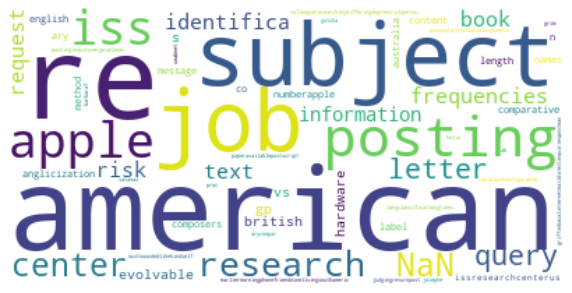

In [149]:
text = str(df[df['label']== 0])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,10), frameon=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

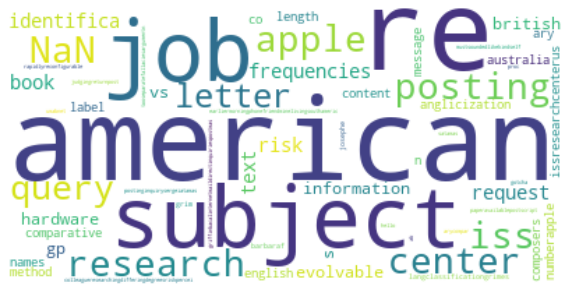

In [150]:
text2 = str(df[df['label']== 1])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,10), frameon=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#here the columns are seperated. 
x = df['message']
y=df['label']

In [18]:
#splitting dataset by 75% for train and 25% for test
X_train,y_train=x[0:2170],y[0:2170]

X_test,y_test=x[2171:],y[2171:]

In [19]:
#extracting features..ML needs numbers to work with
#countVectorizer represent string as count of words
cv=CountVectorizer()
features=cv.fit_transform(X_train)

In [20]:
#building ML model
#command to build model
#fit function is used for training model, after this it can be used to make predictions
model=MultinomialNB()
model.fit(features,y_train) 

MultinomialNB()

In [21]:
#transforming the test data
features_test=cv.transform(X_test)

In [22]:
#checking the accuracy of the model
#score function is sued with extracted features

print("Accuracy of Model",model.score(features_test,y_test)*100,"%") 

Accuracy of Model 99.03047091412742 %


In [23]:
model.predict(features_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [198]:
#testing the model

comment=[" congratulations! you have won lottery"]

In [199]:
vect = cv.transform(comment)

In [200]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")
           

This particular mail is SPAM


In [201]:
text=["The IRS is trying to contact you"]

In [202]:
vect = cv.transform(text)

In [203]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is SPAM


In [204]:
text2=["Verify Your Bank Account."]

In [205]:
vect = cv.transform(text2)

In [206]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is SPAM


In [210]:
text3=["Bitcoin, Anyone?"]

In [211]:
vect = cv.transform(text3)

In [212]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is HAM


In [213]:
text4=["Hello! could you schedule a meeting at 5pm?"]

In [214]:
vect=cv.transform(text4)

In [215]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is HAM


In [237]:
text5 =["It is sunny now."]

In [238]:
vect =cv.transform(text5)

In [239]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is SPAM


In [240]:
text7=["Bad day"]

In [241]:
vect = cv.transform(text7)

In [242]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is SPAM


In [243]:
message = ["How are you"]

In [244]:
vect = cv.transform(message)

In [245]:
if model.predict(vect)== 0:
    print("This particular mail is HAM")

else:
    print("This particular mail is SPAM")

This particular mail is HAM
